<a href="https://colab.research.google.com/github/mumorais/MNEC-lab/blob/master/Showcase_pyFRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyFRF

In [3]:
from pyFRF import FRF
import numpy as np
import matplotlib.pyplot as plt


In [12]:
C = 0.5+0.1j  # modal constant
eta = 5e-3    # damping loss factor
f0 = 320      # natural frequency
df = 1        # freq resolution
D = 1.e-8*(1-0.1j) # residual

f = 1*np.arange(1,1400,step = df) # / frequency range

w0 = f0 * 2 * np.pi # to rad/s
w  =  f * 2 * np.pi
H1_syn = C/(w0**2 - w**2 + 1.j * eta * w0**2) + \
      + 0.50*np.conj(C) / ((w0*2)**2 - w**2 + 1.j * eta * (w0*2)**2) \
      + 0.25*C / ((w0*3)**2 - w**2 + 1.j * eta * (w0*3)**2) \
      + D

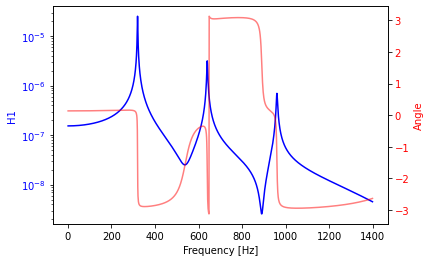

In [13]:
fig, ax1 = plt.subplots()
ax1.semilogy(f,np.abs(H1_syn), 'b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('H1', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(f,np.angle(H1_syn), 'r', alpha=0.5)
ax2.set_ylabel('Angle', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [42]:
h = np.fft.irfft(H1_syn)      # print(len(h))
l = len(H1_syn)*2-2           # print(l)
t = np.linspace(0, 1, num=l)  # print(t)
exc = np.zeros_like(t)        # print(exc)
exc[0] = 1

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(t, exc, 'b');
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Excitation', color='b')
ax1.set_xlim(left=-0.2, right=1)
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(t, h, 'r', alpha=0.7)
ax2.set_ylabel('Response', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [44]:
frf = FRF(sampling_freq=1/t[1], exc=exc, resp=h, exc_window='None', resp_type='d', resp_window='None')

In [45]:
len(frf.get_f_axis())

1399

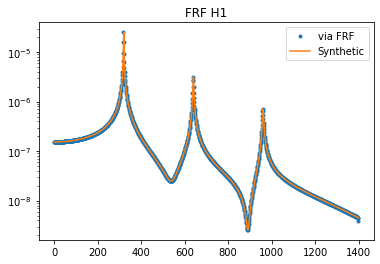

In [46]:
plt.semilogy(frf.get_f_axis(), np.abs(frf.get_FRF()), '.', label='via FRF')
plt.semilogy(f, np.abs(H1_syn), label='Synthetic')
plt.title('FRF H1')
plt.legend();

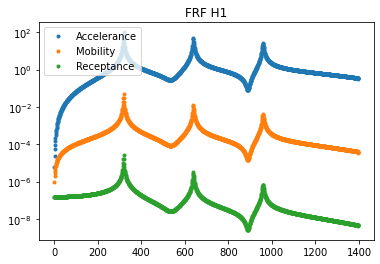

In [47]:
plt.semilogy(frf.get_f_axis(), np.abs(frf.get_FRF(form='accelerance')), '.', label='Accelerance')
plt.semilogy(frf.get_f_axis(), np.abs(frf.get_FRF(form='mobility')), '.', label='Mobility')
plt.semilogy(frf.get_f_axis(), np.abs(frf.get_FRF(form='receptance')), '.', label='Receptance')
plt.title('FRF H1')
plt.legend();

In [49]:
# prepare the instance of FRF 
averages = 10
frf = FRF(sampling_freq=1/t[1], fft_len=len(h), exc_window='None', \
          resp_window='None', resp_type='d', weighting='Linear', n_averages=averages)

In [50]:
k = 0.1 # rate of noise
for i in range(averages):
    noise = k * (np.random.rand(len(h))-0.5) * np.std(h)
    frf.add_data(exc, h + noise)

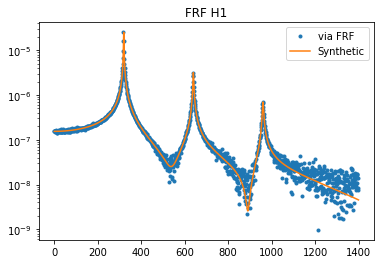

In [51]:
plt.semilogy(frf.get_f_axis(), np.abs(frf.get_H1()), '.', label='via FRF')
plt.semilogy(f, np.abs(H1_syn), label='Synthetic')
plt.title('FRF H1')
plt.legend();

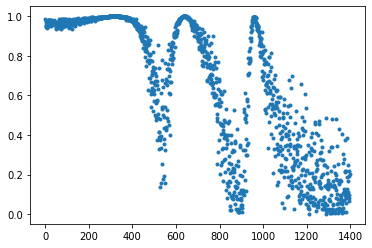

In [52]:
plt.plot(frf.get_f_axis(), frf.get_coherence(), '.');